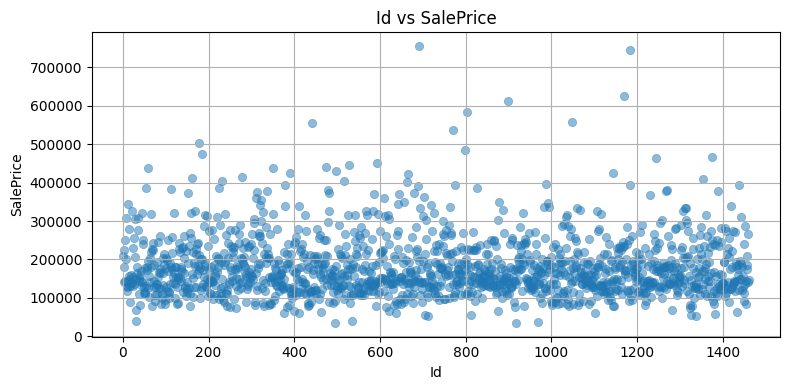

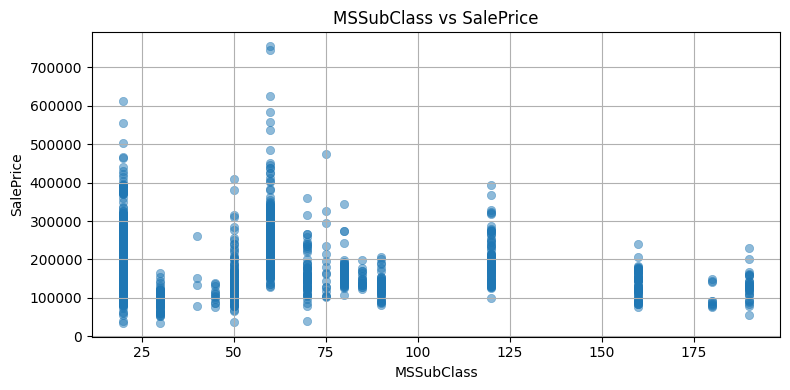

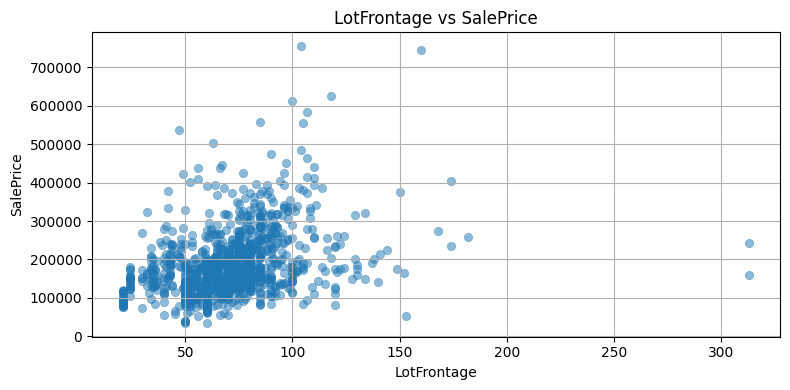

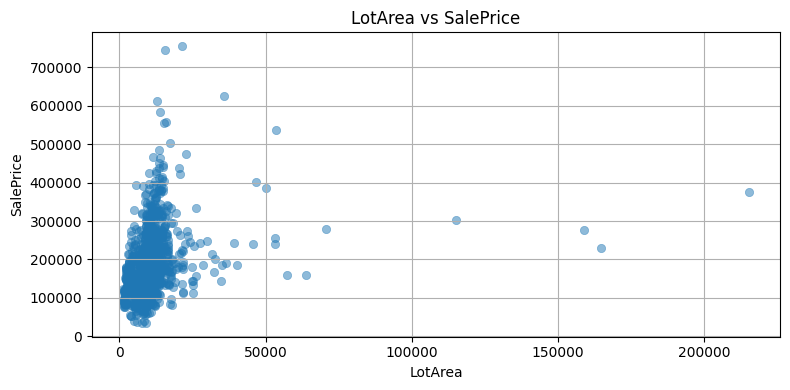

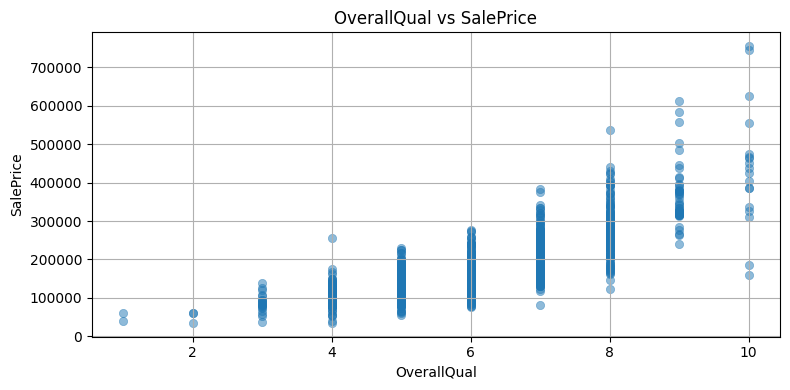

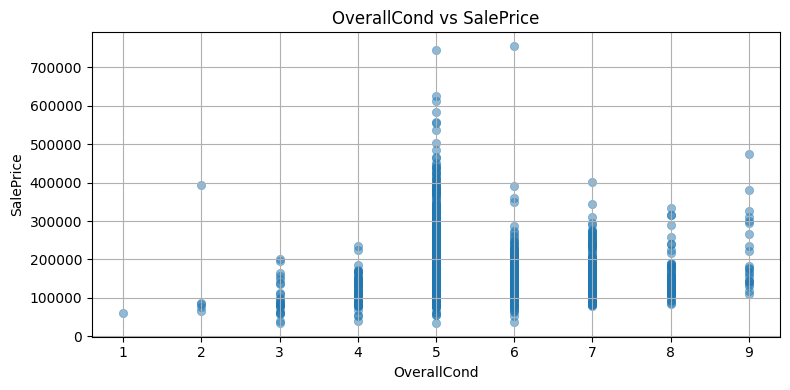

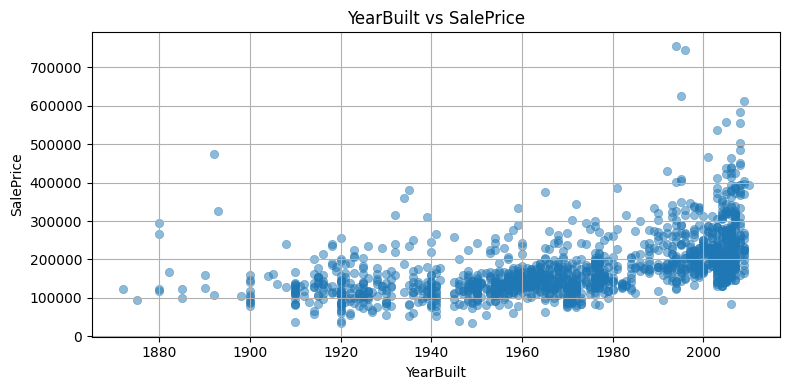

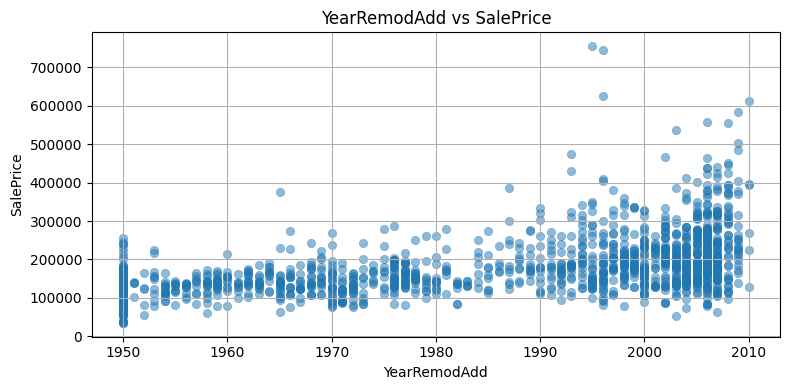

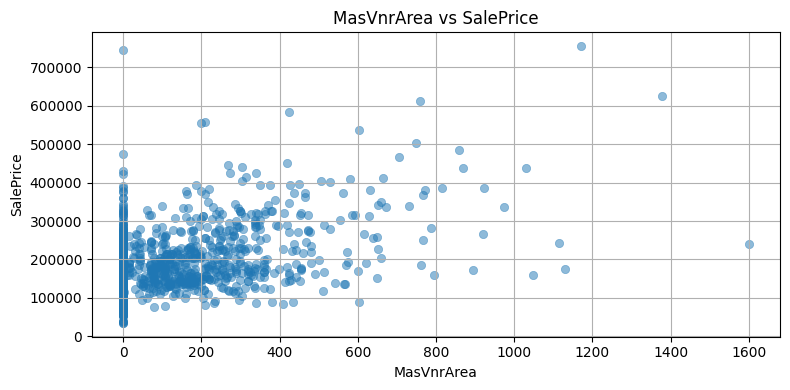

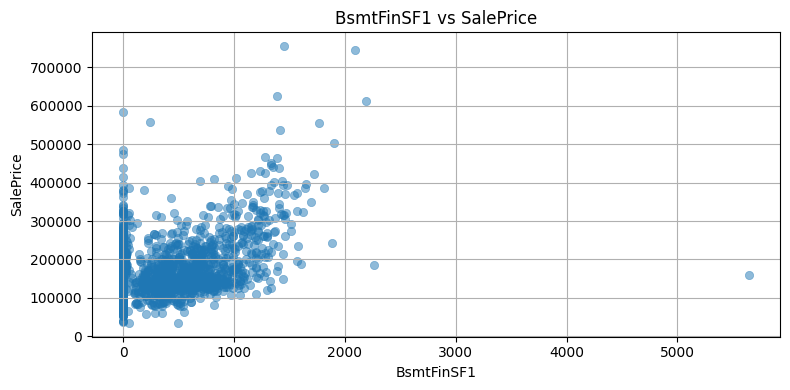

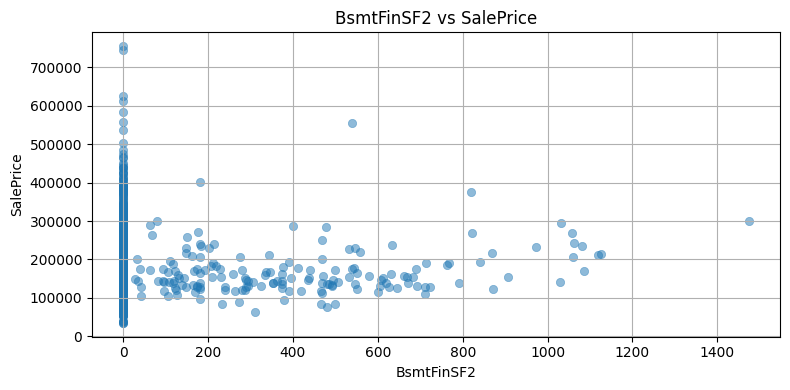

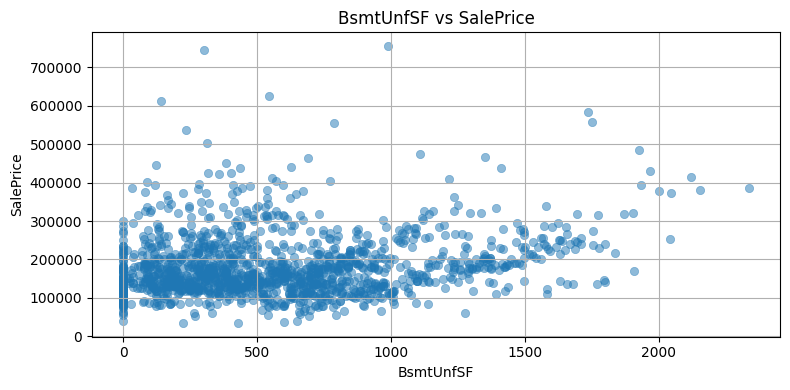

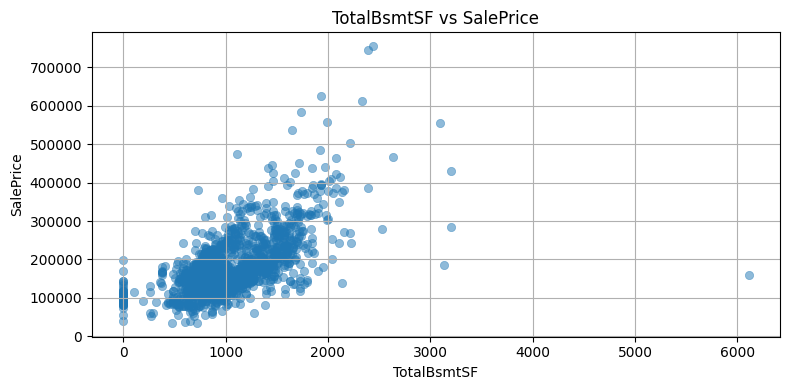

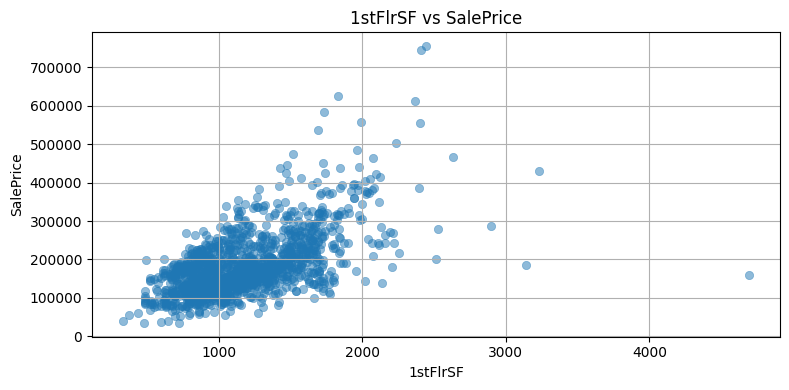

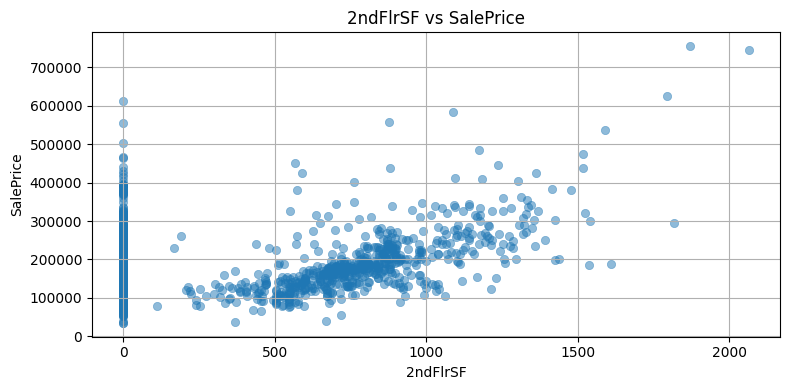

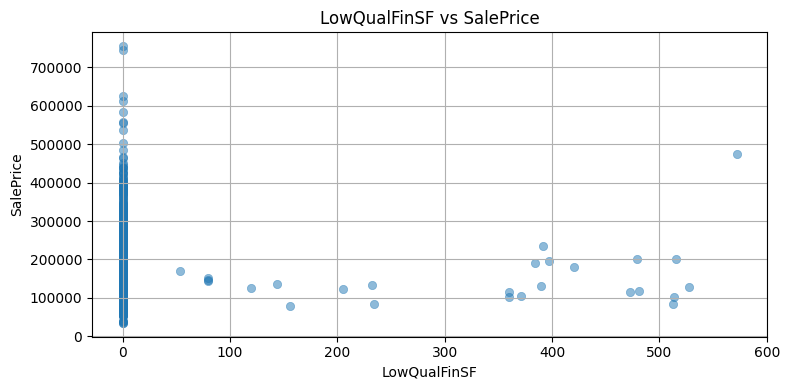

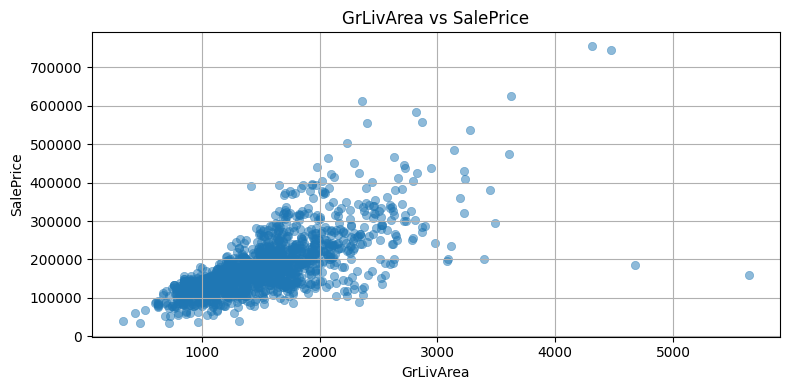

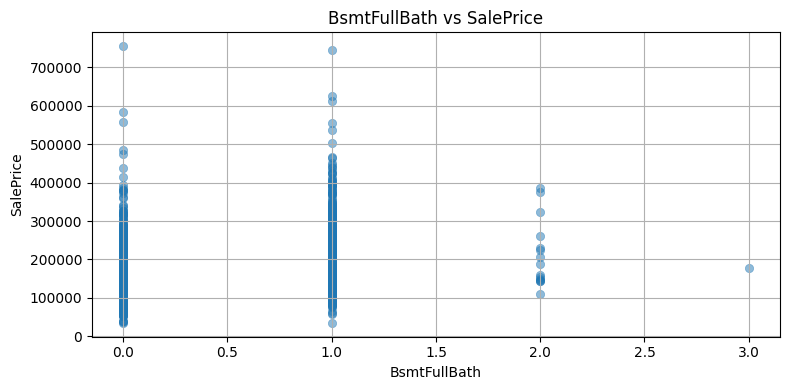

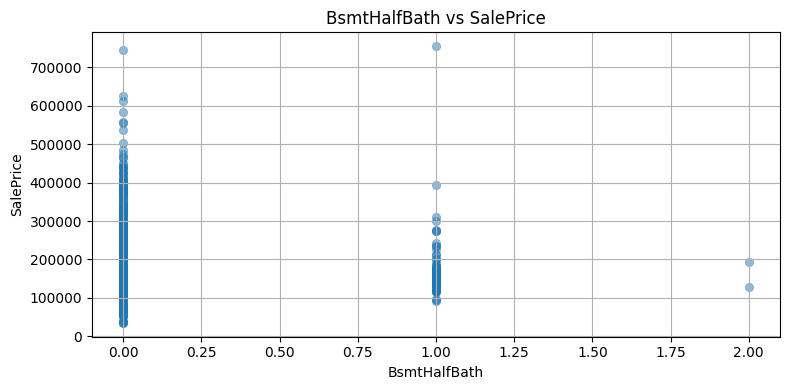

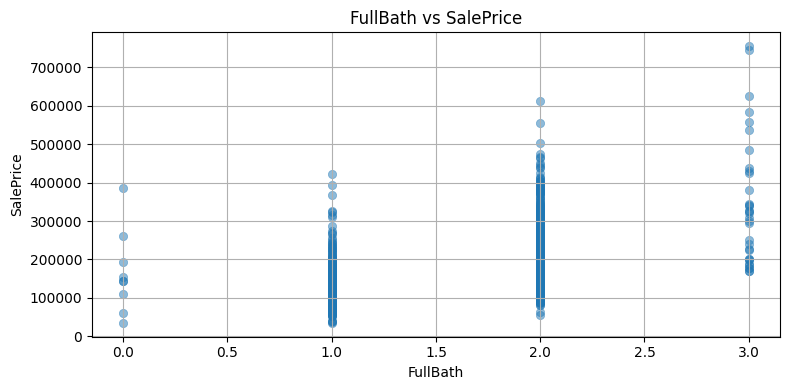

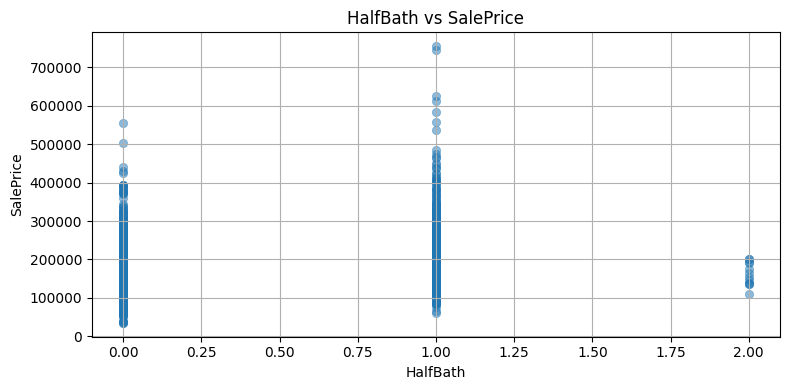

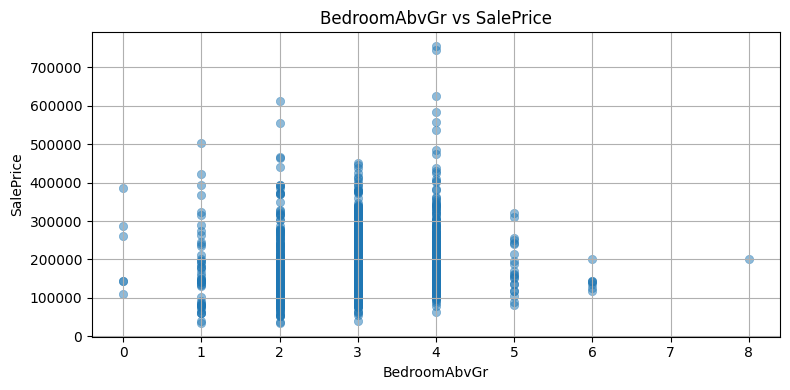

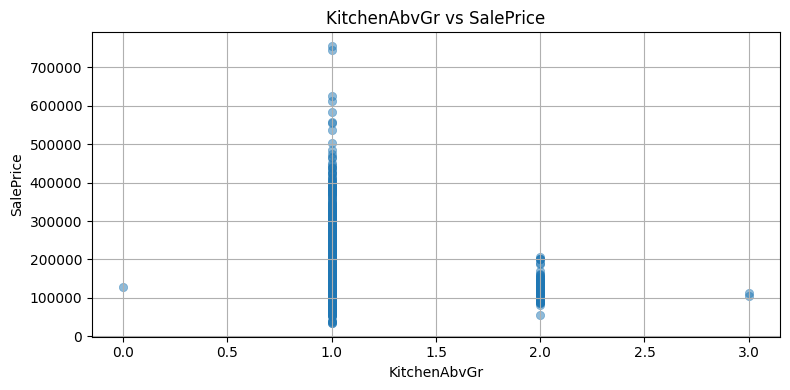

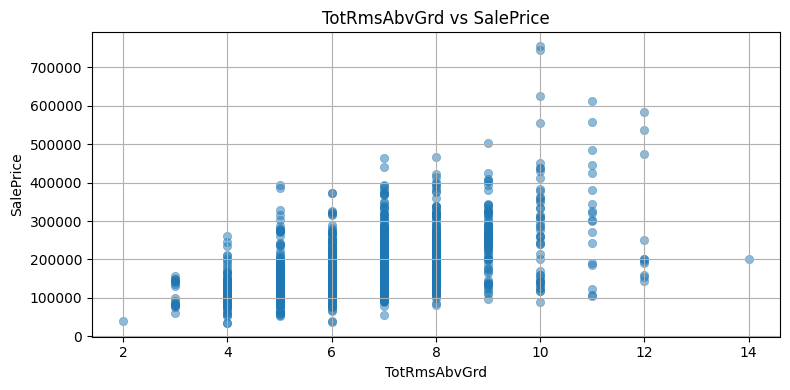

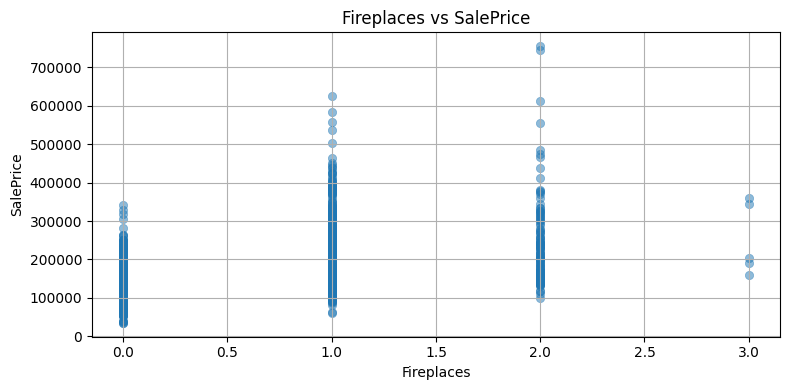

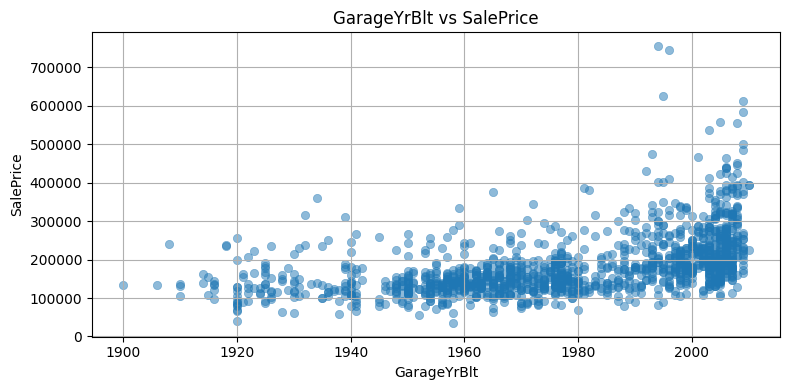

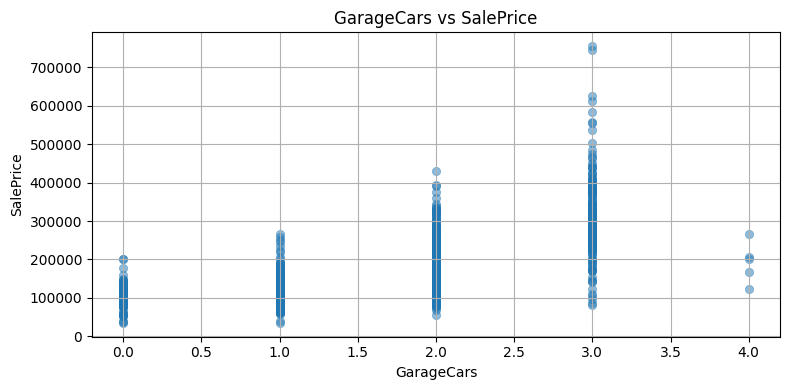

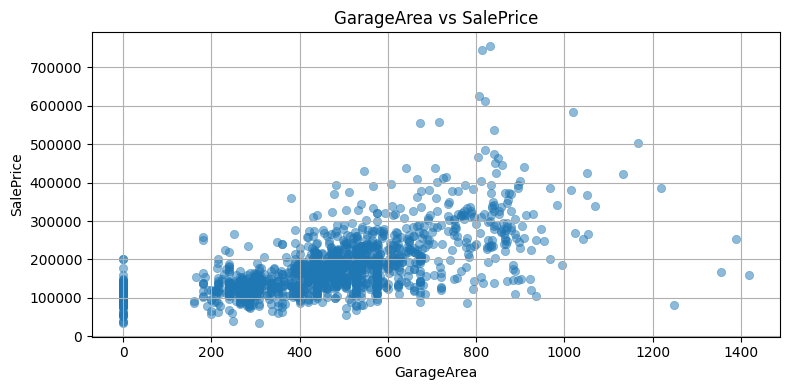

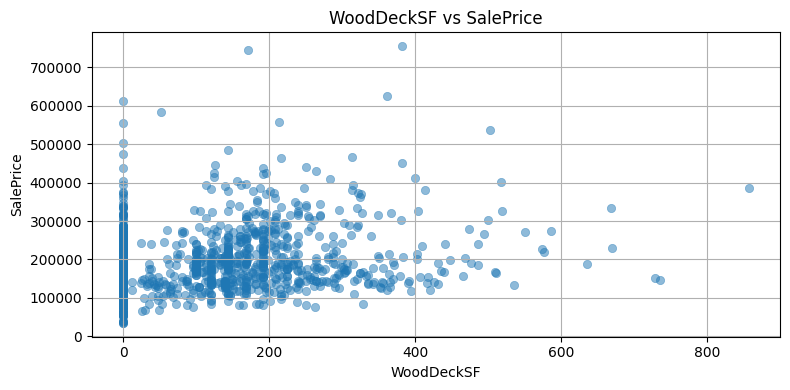

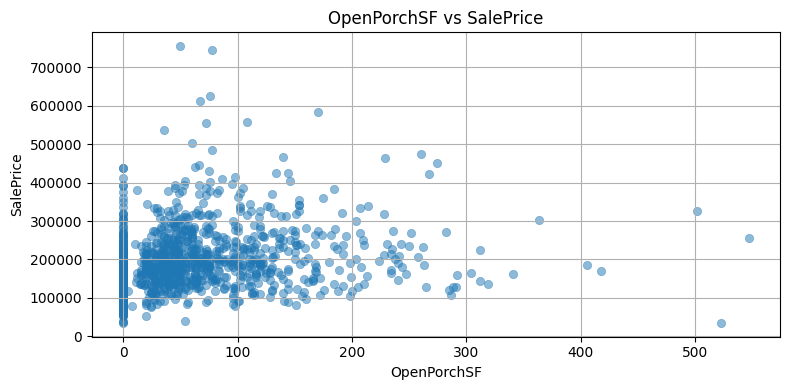

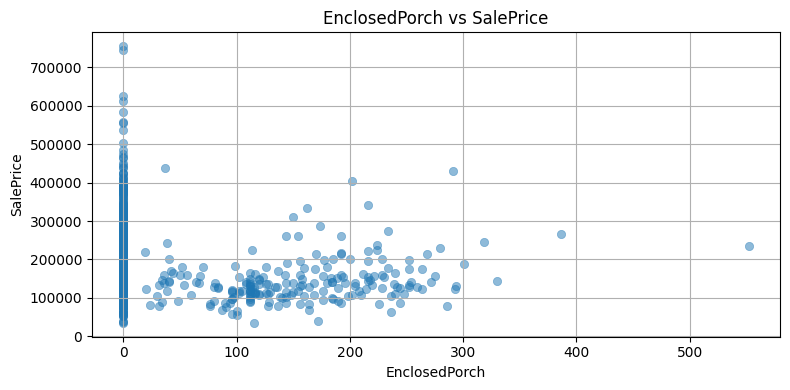

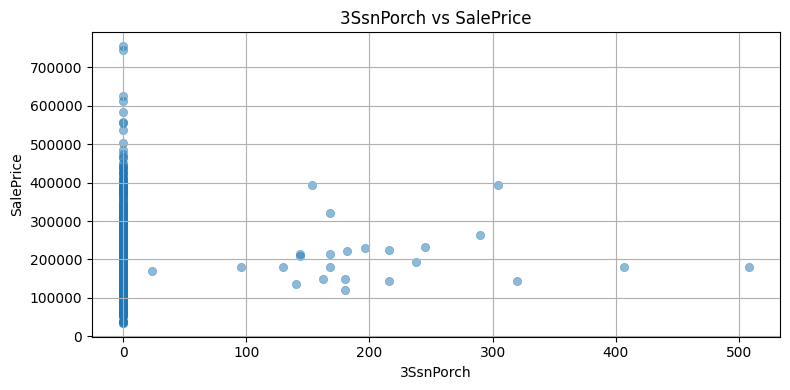

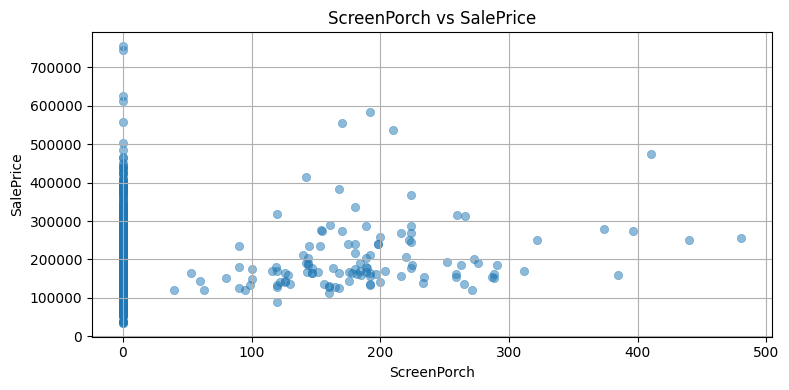

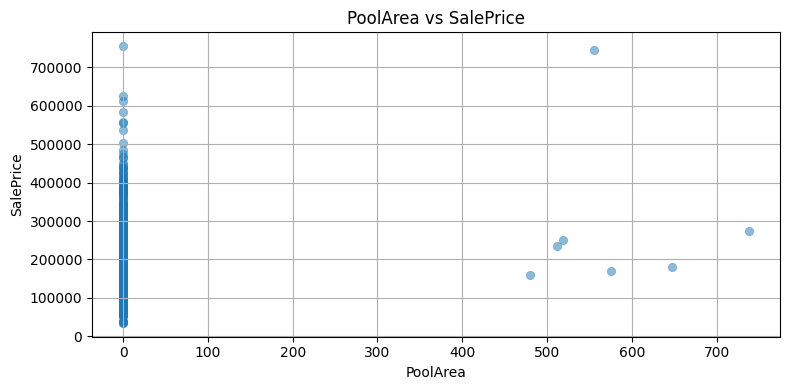

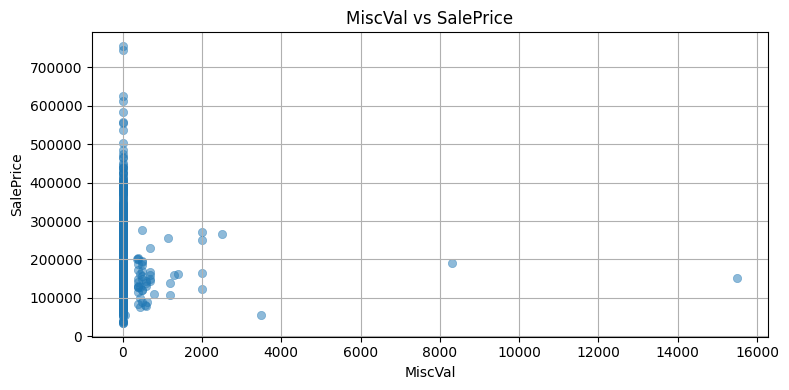

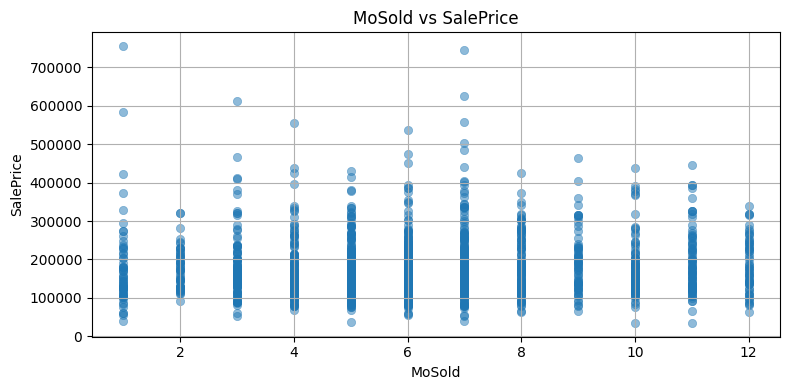

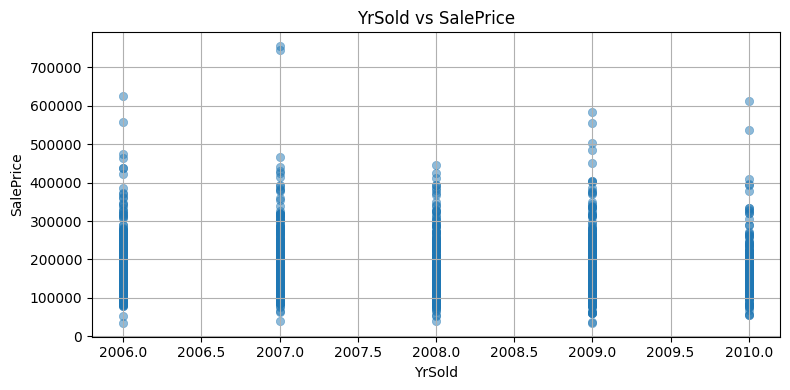

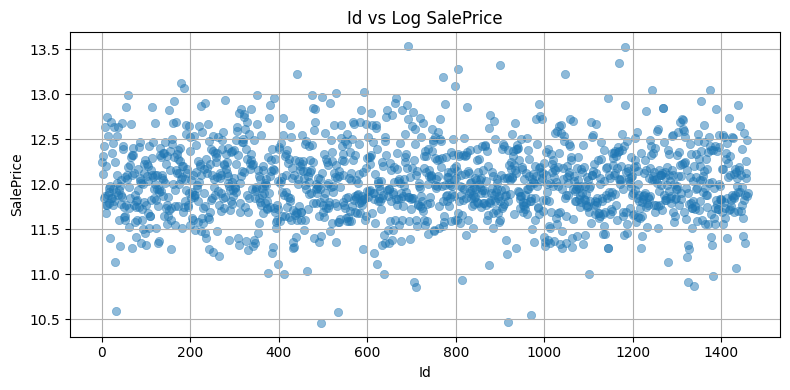

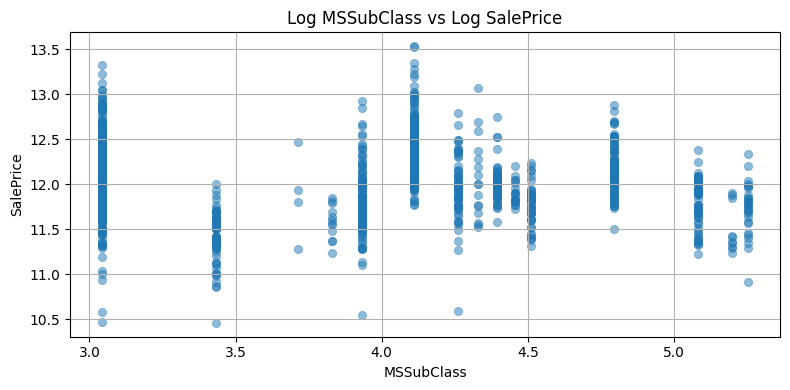

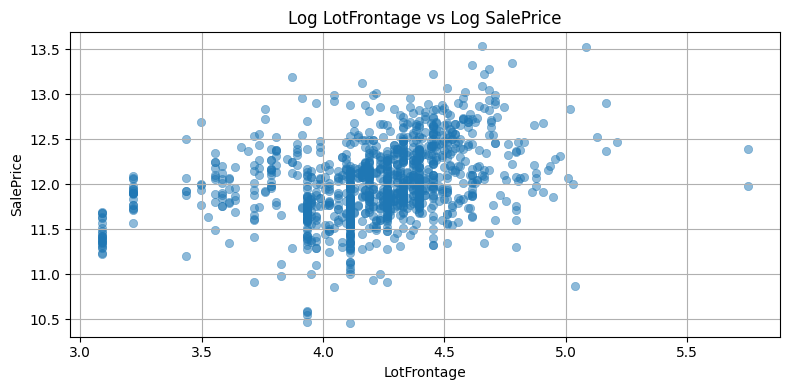

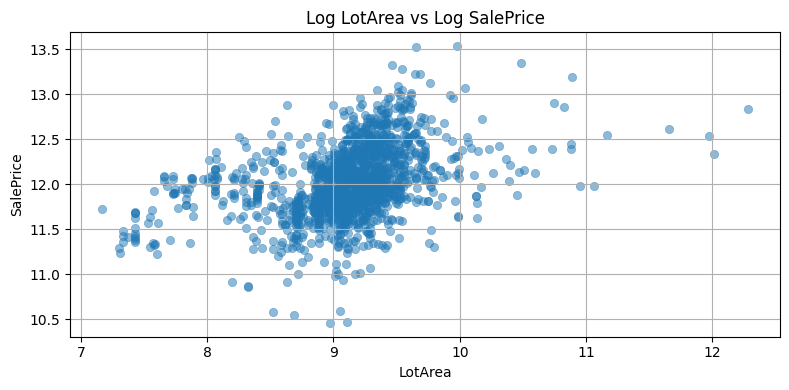

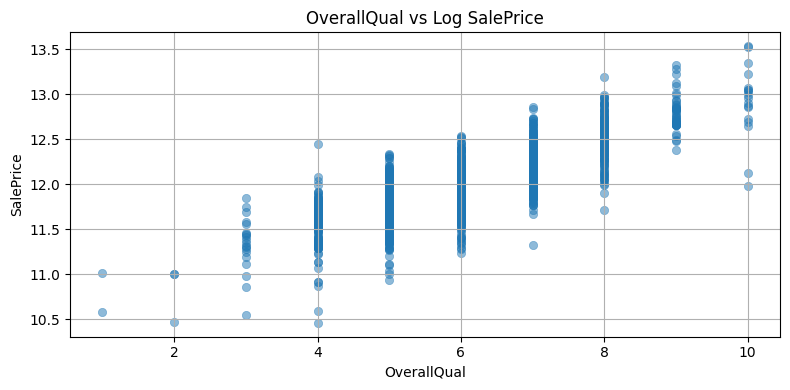

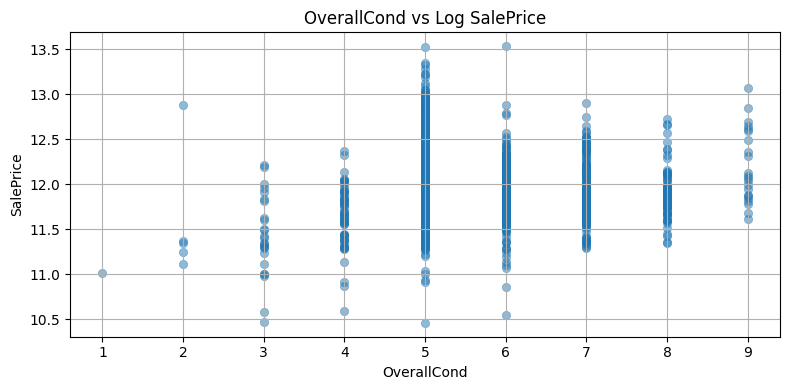

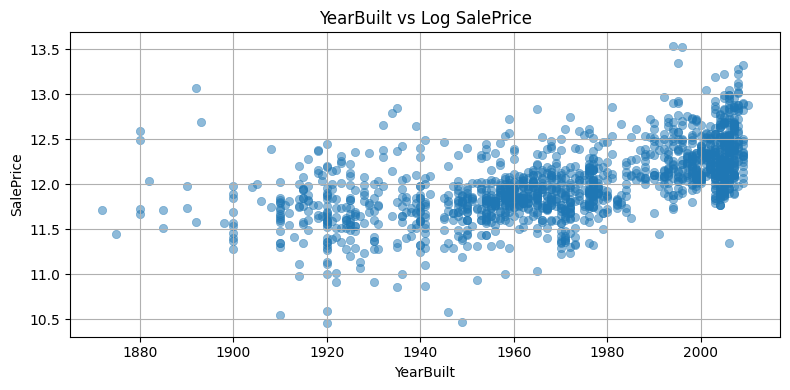

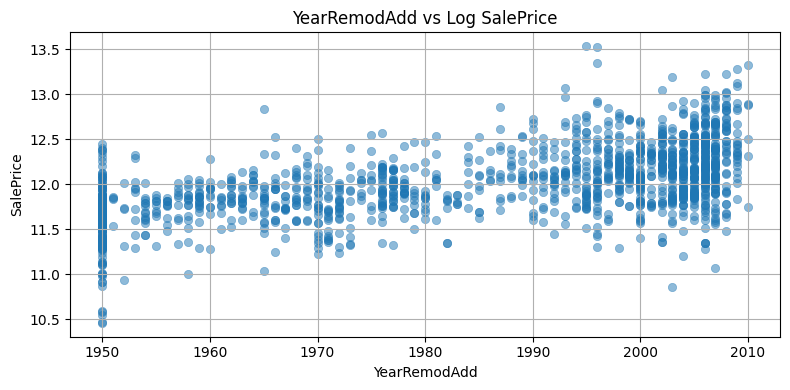

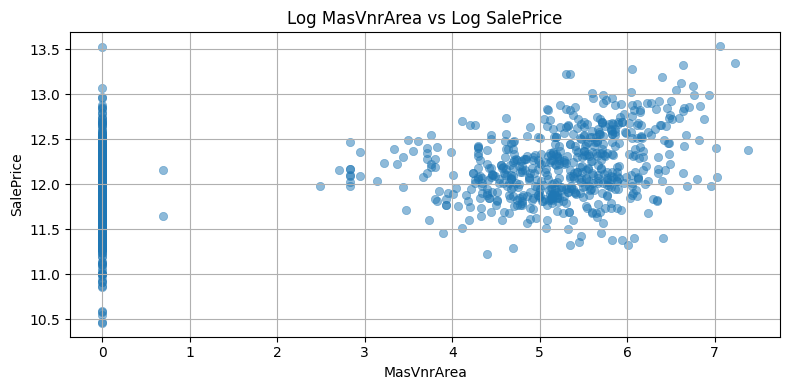

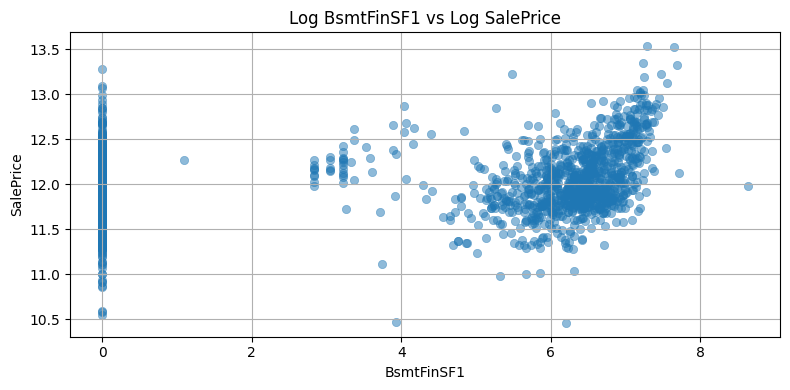

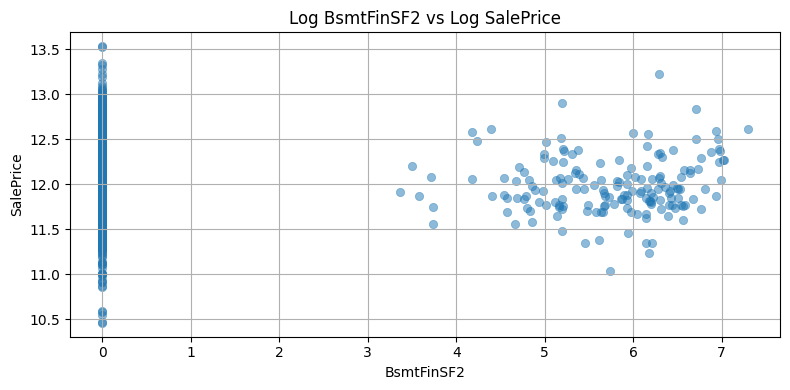

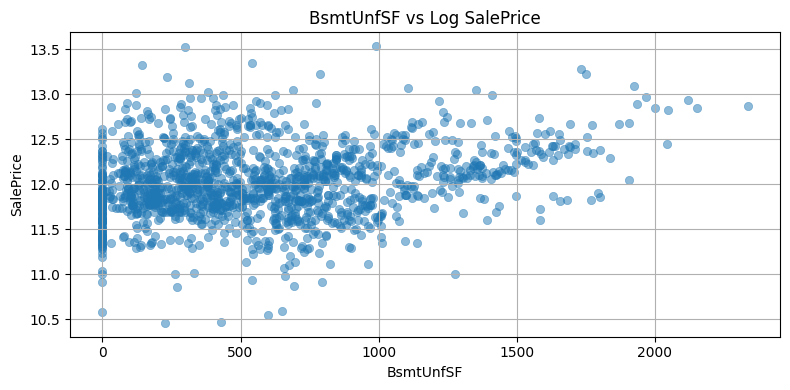

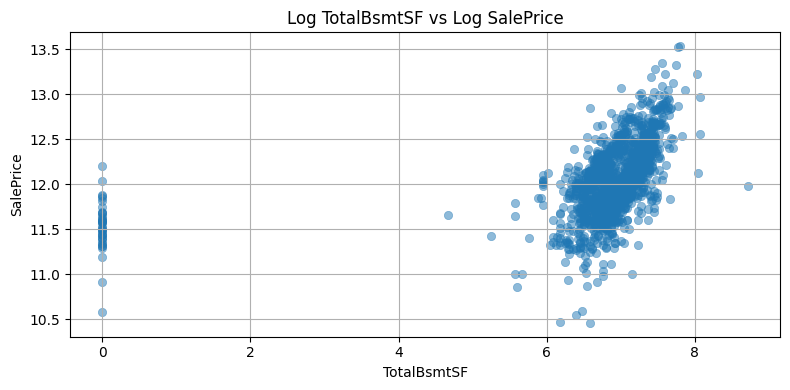

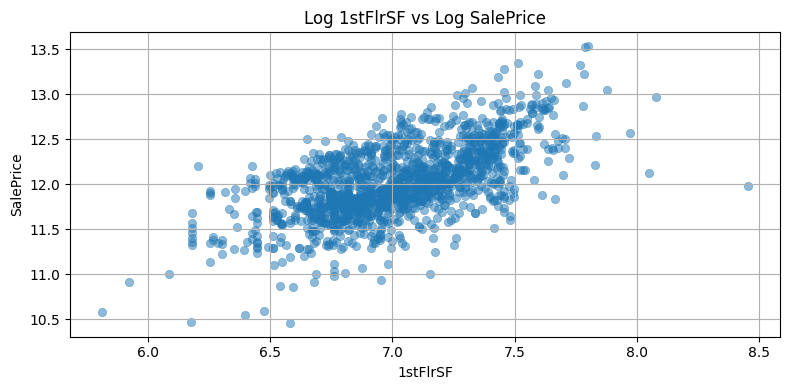

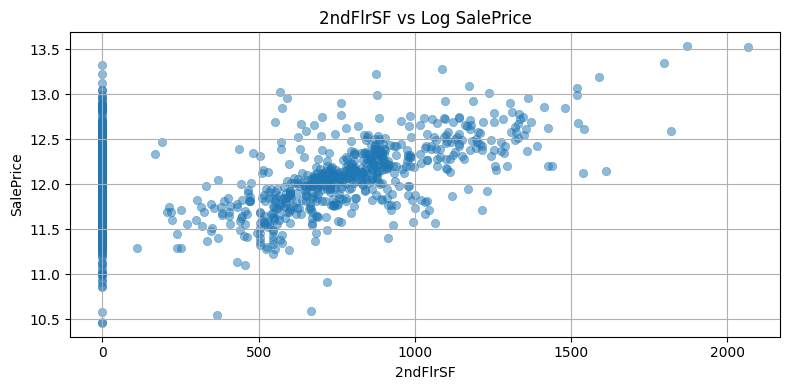

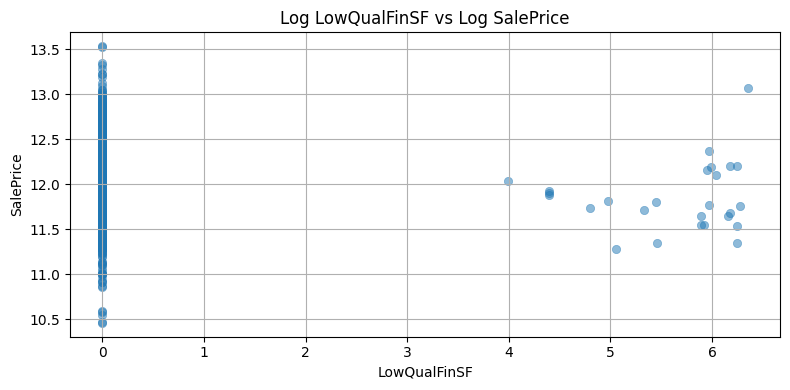

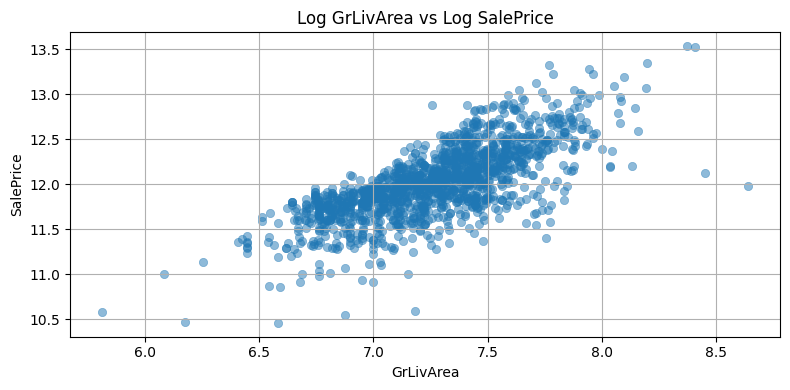

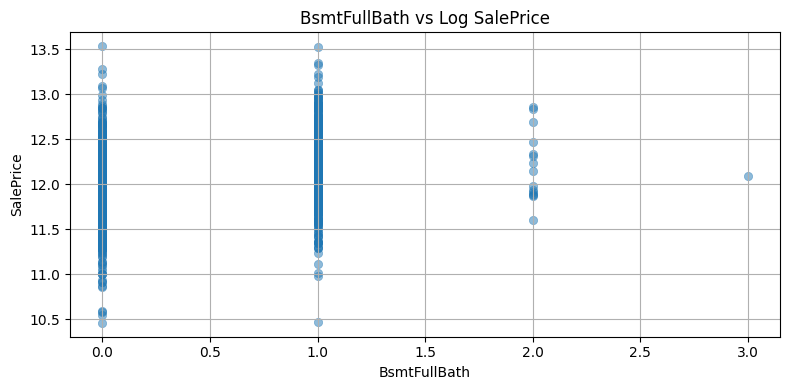

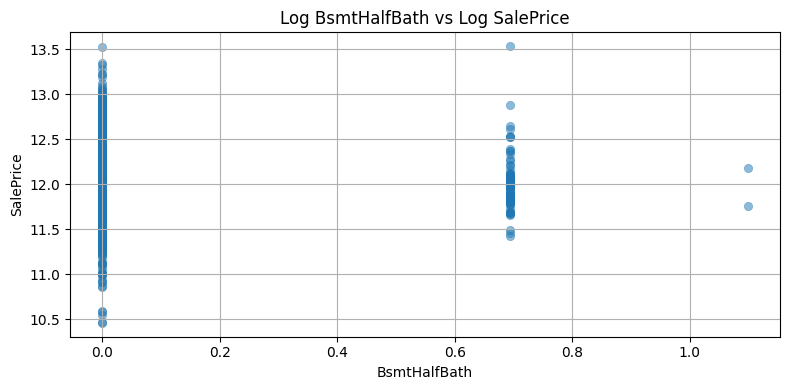

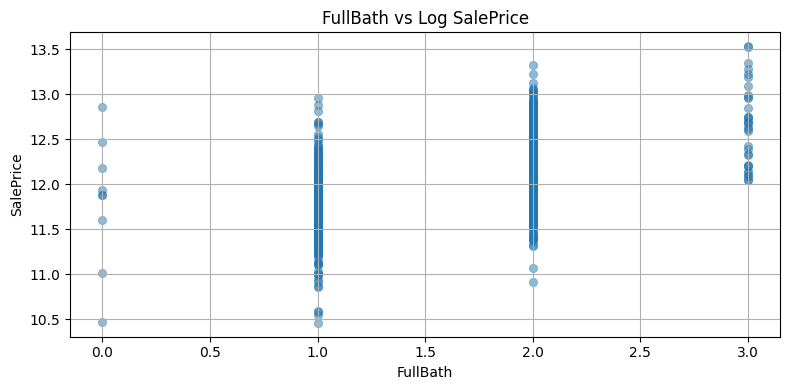

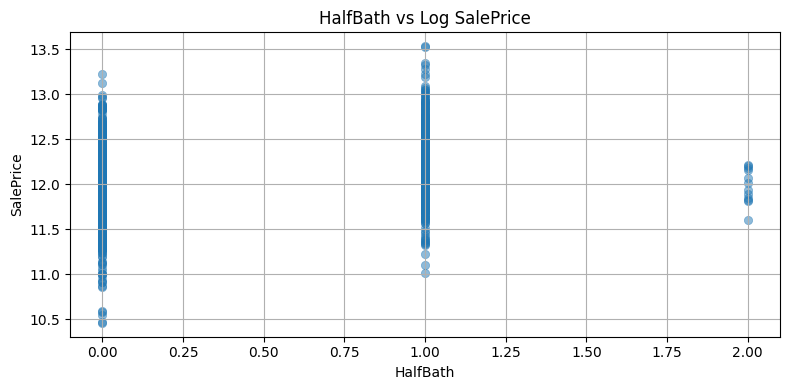

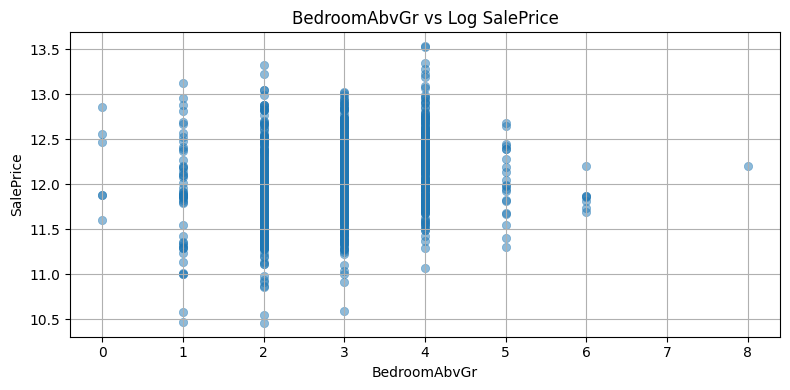

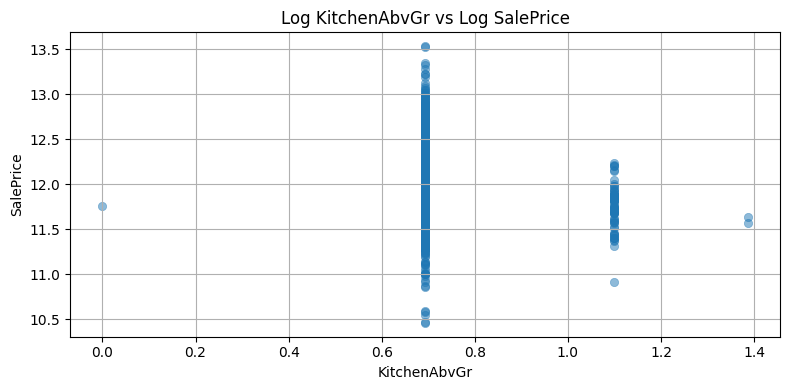

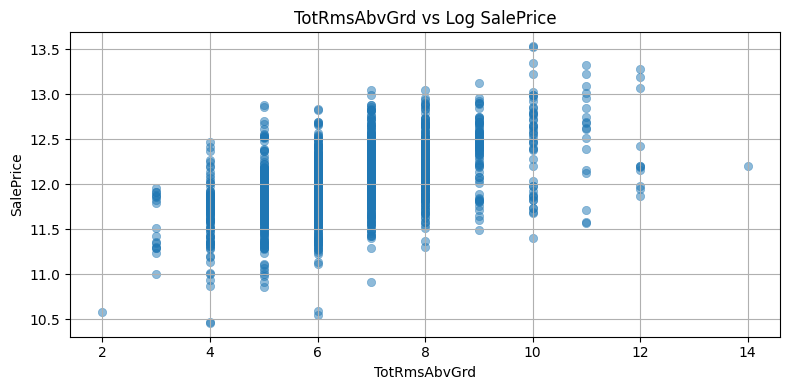

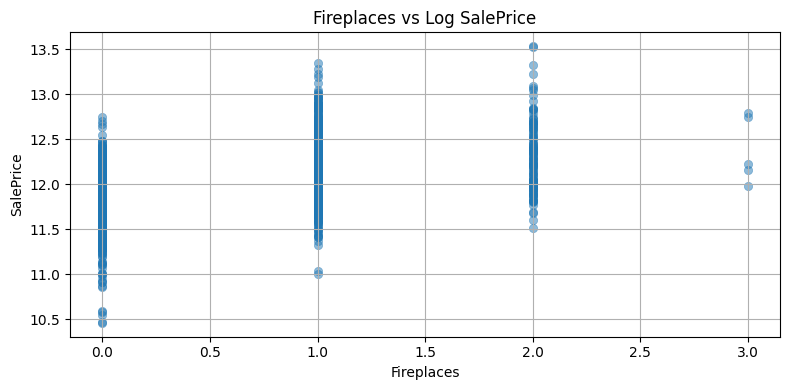

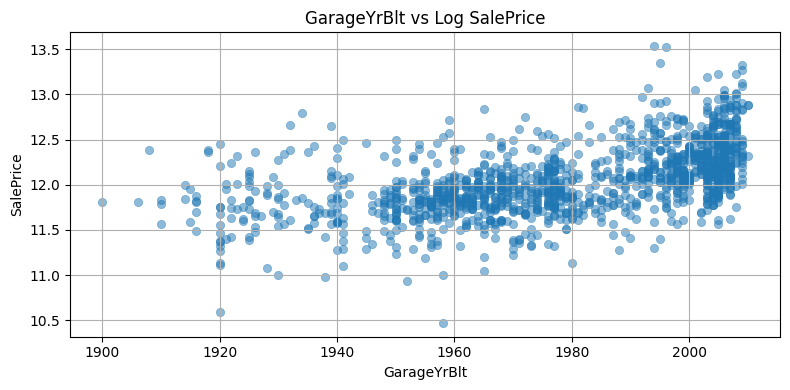

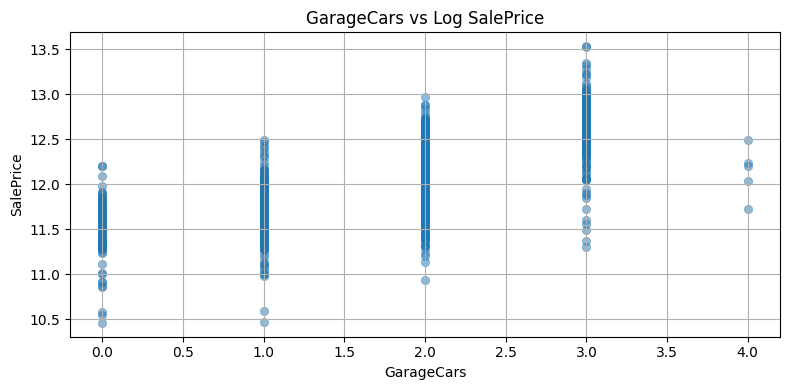

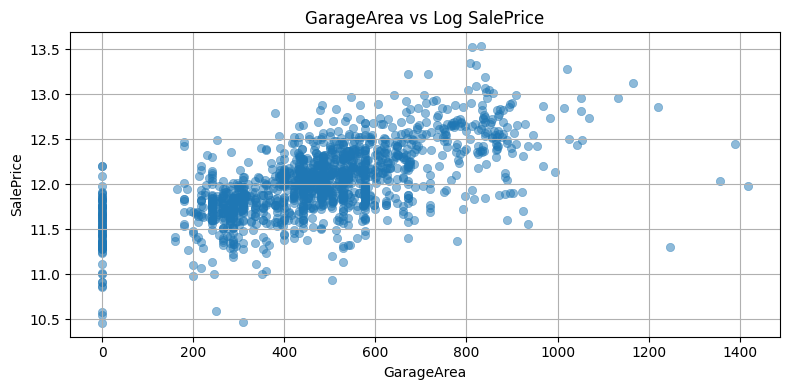

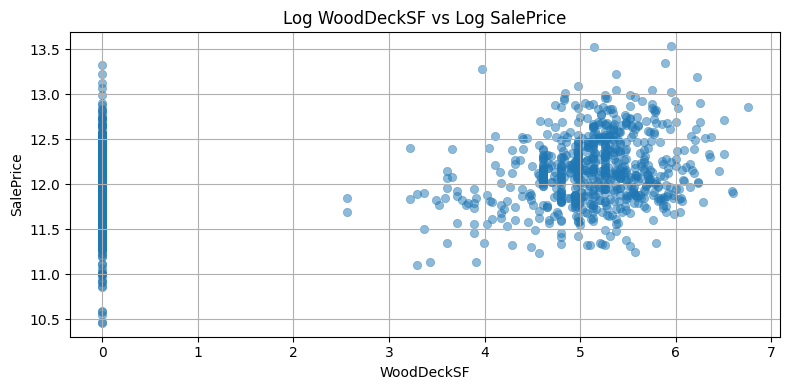

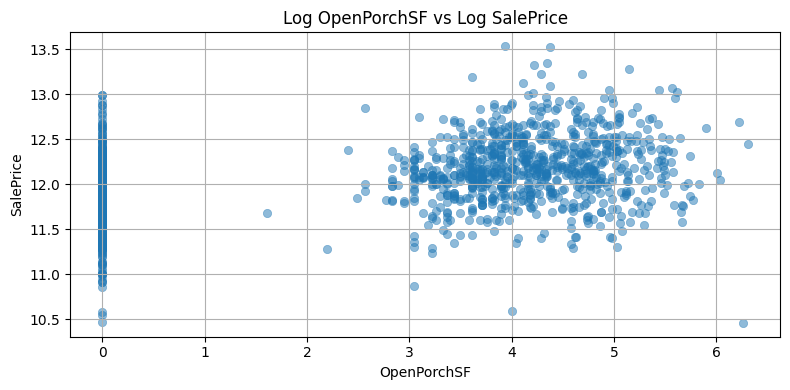

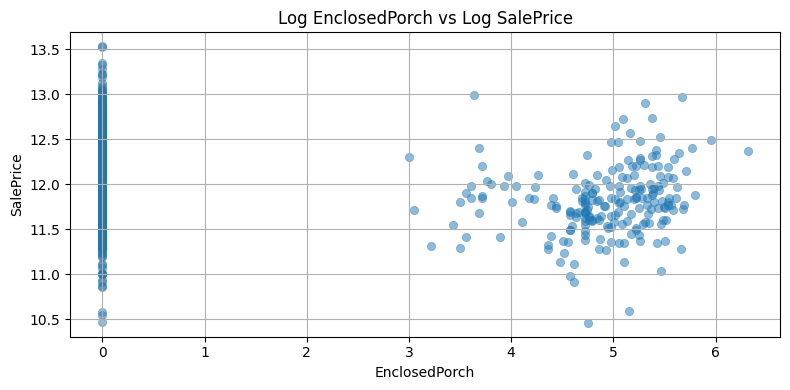

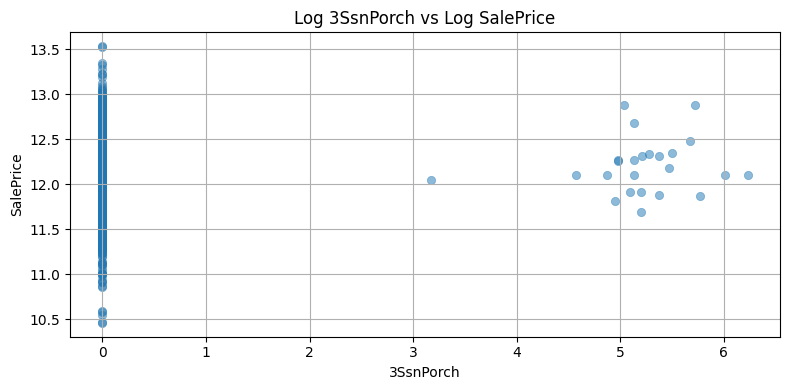

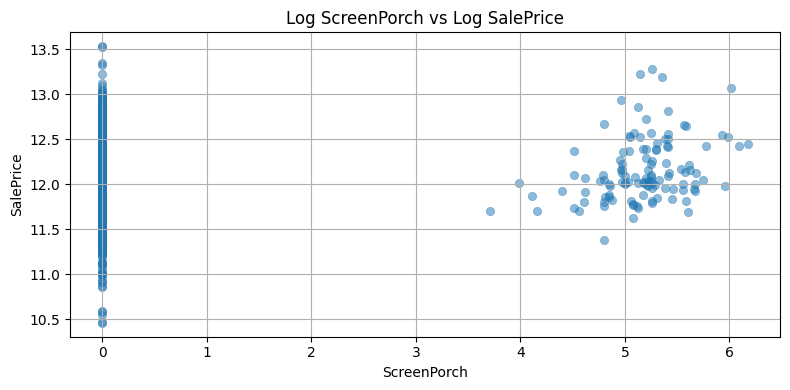

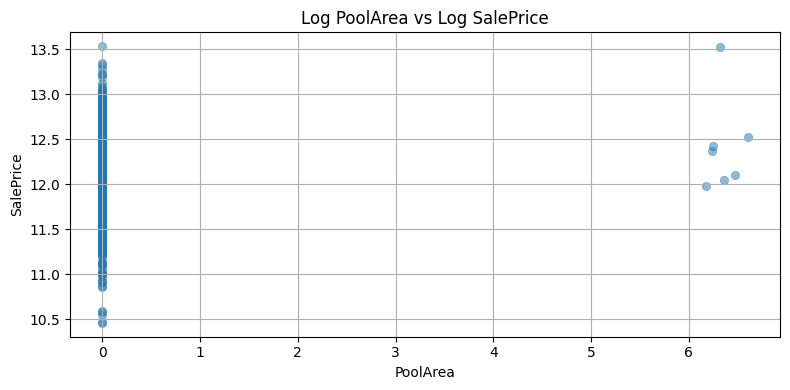

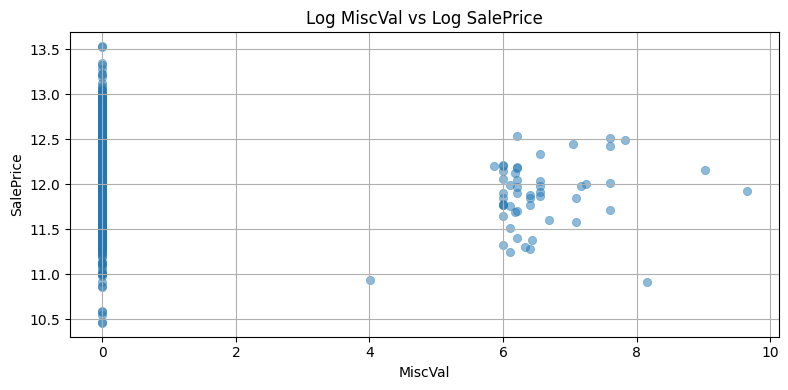

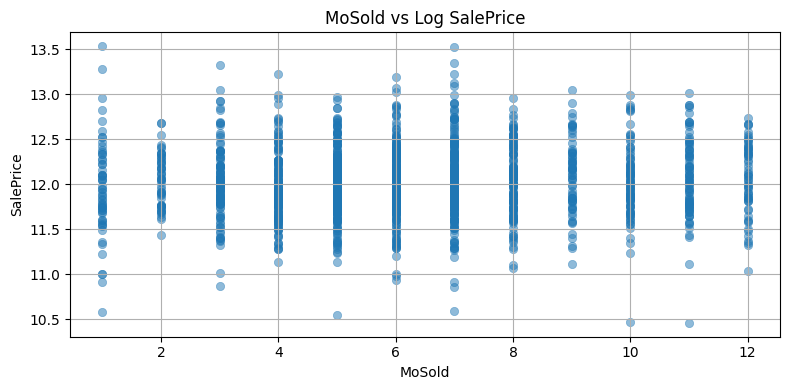

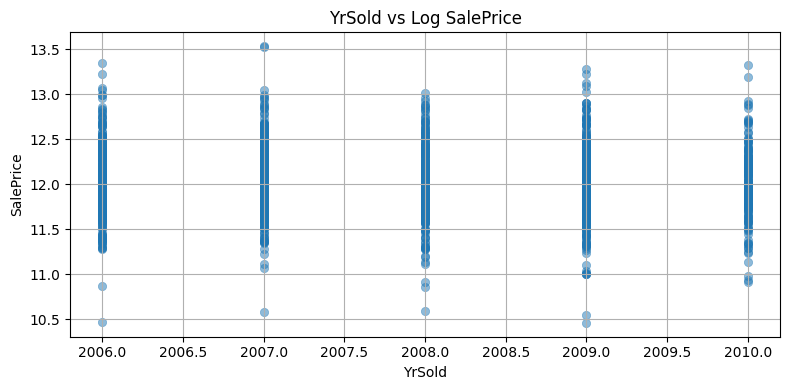

In [ ]:
# %%

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('../data/train.csv')

# Get all numeric columns excluding the target
numeric_cols = df.select_dtypes(include='number').columns
predictors = numeric_cols.drop('SalePrice', errors='ignore')

# Plot each predictor against SalePrice
for col in predictors:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=col, y='SalePrice', alpha=0.5, edgecolor=None)
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.close()

# now transform and see the plots
skew_values = df[numeric_cols].skew().sort_values(ascending=False)
high_skew_cols = skew_values[skew_values > 1].index
for col in high_skew_cols:
    df[col] = np.log1p(df[col])

# Plot each predictor against SalePrice
for col in predictors:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=col, y='SalePrice', alpha=0.5, edgecolor=None)
    plt.title(f'{"Log " if col in high_skew_cols else ""}{col} vs Log SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.close()